# Data Cleaning and EDA for [Auto Insurance Claims Data](https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data)

Kaggle: Auto-Insurance-Claims-Data

Notebook Layout:
- Cleaning
- EDA and Visualizations

In [59]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
import os


import requests
from bs4 import BeautifulSoup

import warnings 
warnings.filterwarnings('ignore')

In [60]:
# Formatting
pd.set_option("display.max_columns", None)

# Path reference to make import statements concise
path = '/Users/samalainabayeva/Documents/Omdena/insurance_claims.csv'

In [61]:
# Loading the data

df = pd.read_csv(path, parse_dates=["incident_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   object        
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

### Initial Observations:
The data are 1000 rows with 40 columns. **One feature column, "_c39", is entirely null**, and a **second column, authorities_contacted** also contains null values. All other columns seem to have valid entries for all 1000 rows of data.

In [62]:
# Visual Inspection
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


### Fraud Detected
The original purpose of this data was to help insurance companies detect fraudulent claims. There are labels for fraudulent and non-fraudulent claims under the "fraud_reported" column. `I suggest that we omit the fraudulent claims from our final aggregated data set.`

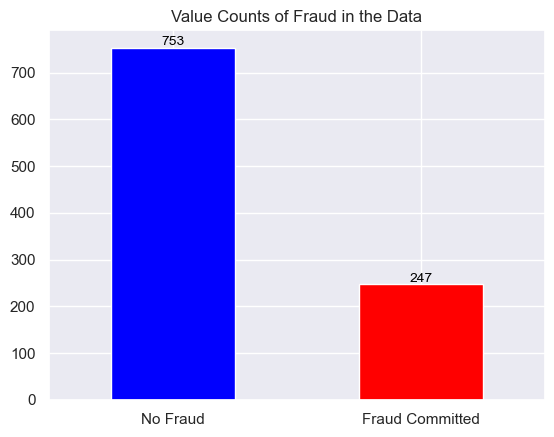

In [63]:
# Value Counts - plotted

sns.set()
ax = df["fraud_reported"].value_counts(dropna=False).\
rename({"N":"No Fraud", "Y":"Fraud Committed"}).plot(kind='bar', rot=0, color=["blue", "red"])
for bars in ax.patches:
    ax.annotate(text=f"{bars.get_height()}", xy=(bars.get_x() + (bars.get_width() / 2), bars.get_height()), 
                ha="center", va="center", xytext=(0,4), textcoords='offset points', fontsize=10, color="black")
ax.set_xlabel("")
ax.set_title("Value Counts of Fraud in the Data");

<hr style="border:3px solid blue">

### Imputing null values

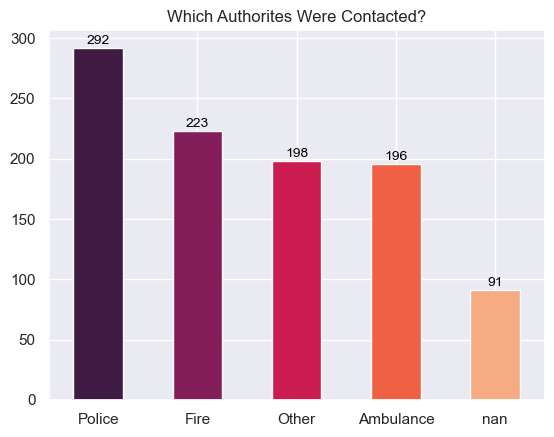

In [64]:
# Inspecting "authorities_contacted"
df["authorities_contacted"].value_counts(dropna=False)

ax = df["authorities_contacted"].value_counts(dropna=False).plot(kind='bar', rot=0, color=sns.color_palette("rocket", n_colors=5))
for bars in ax.patches:
    ax.annotate(text=f"{bars.get_height()}", xy=(bars.get_x() + (bars.get_width() / 2), bars.get_height()), 
                ha="center", va="center", xytext=(0,5), textcoords='offset points', fontsize=10, color="black")
ax.set_xlabel("")
ax.set_title("Which Authorites Were Contacted?");

### Handling Nulls

For these null values, **every claim that was filed was for 1 car.** The filer of the claim either had their car stolen or had their parked car damaged. In either case, there was never evidence to report to an authority, and the victims' only recourse was to file insurance claims.

In [65]:
# Inspecting the data where authorities are null and activity is not fraudulent -> 85 rows

df.loc[(df["authorities_contacted"].isna()) & (df["fraud_reported"] == "N"), "incident_type"].value_counts()

incident_type
Parked Car       46
Vehicle Theft    39
Name: count, dtype: int64

In [66]:
# All non-fraudulent claims were 1-car accidents
df.loc[(df["authorities_contacted"].isna()) & (df["fraud_reported"] == "N"), "number_of_vehicles_involved"].value_counts()

number_of_vehicles_involved
1    85
Name: count, dtype: int64

<hr style="border:2px solid blue">

### Filling 26 / 85 missing values

In [67]:
# 26 / 85 missing values have a police report, so I think it would be reasonable to fill them as such
df.loc[(df["authorities_contacted"].isna()) & (df["fraud_reported"] == "N"), "police_report_available"].value_counts()

police_report_available
NO     34
YES    26
?      25
Name: count, dtype: int64

In [68]:
# Filling the nulls for authorities contact that do have police reports available
df.loc[(df["authorities_contacted"].isna()) & 
       (df["fraud_reported"] == "N") & 
       (df["police_report_available"] == "YES"), "authorities_contacted"] = "Police"

In [69]:
# After filling the values
df.loc[(df["authorities_contacted"].isna()) & (df["fraud_reported"] == "N"), "police_report_available"].value_counts()

police_report_available
NO    34
?     25
Name: count, dtype: int64

<hr style="border:2px solid blue">


### Investigating other 1-Car accidents where "authorities_contacted" is NOT NULL

In [70]:
# 389 additional single-car claims that are not fraudulent

# Creating new df for conditional inspection
single_car_auth = df.query("number_of_vehicles_involved == 1 & fraud_reported == \
'N' & authorities_contacted.notna()")
single_car_auth["incident_type"].value_counts()

incident_type
Single Vehicle Collision    286
Vehicle Theft                58
Parked Car                   45
Name: count, dtype: int64

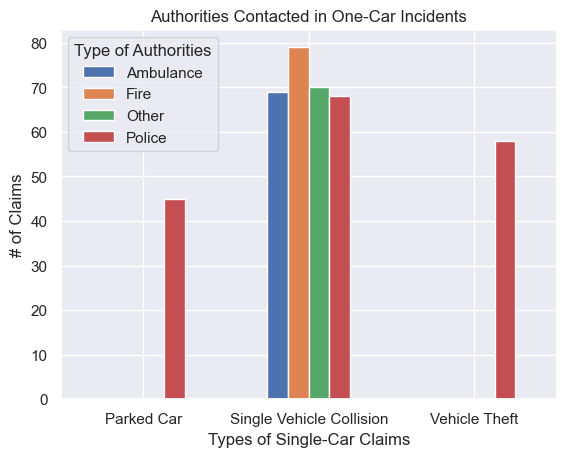

In [71]:
# Plotting the authorities that were called under certain specific scenarios for One-Car claims
single_car_auth.groupby("incident_type")["authorities_contacted"]\
.value_counts().unstack().plot(kind = "bar", title="Authorities Contacted in One-Car Incidents", rot=0, 
                               xlabel="Types of Single-Car Claims", ylabel="# of Claims")
legend = plt.legend()
legend.set_title("Type of Authorities");

### After some closer inspection, I believe we have two options for filling in this data:
- 1. We can fill the nulls as "Unknown"
or
- 2. We can add the nulls to the "Other" category, as there is not a clear definition of what "Other" includes


For the time being, I will fill the nulls with "Unknown". This is very similar to using a "missing-indicator", and the increase in feature-space is negligible relative to the size of our data, as many included features would already not be useful for modeling. 

In [72]:
# Filling the remaining null values
df["authorities_contacted"] = df["authorities_contacted"].fillna("Unknown")

# Confirmation that all null values are filled -> except the strange column _c39
print("Total Nulls Remaining in Data:", df.drop(columns="_c39").isna().sum().sum())

Total Nulls Remaining in Data: 0


<hr style="border: 3px solid blue">

<div class="alert alert-info alert-block"; style="background-color:blue; font-size:2em; color:white">
    <b>EDA: Null Values Filled, Exploring Relationships </b>
    </div>

Now that the data is cleaned and nulls are filled, I will explore some basic relationships between the data. For this exploration, I will only deal with the legitimate (not fraud) claims, and I will drop the extraneous *_c39* column. I will also partition the features into `"Relevant", "Irrelevant", and "Unsure"` categories using my judgment.

<hr style="border: 3px solid blue">

# Data Dictionary : From [Kaggle Notebook](https://www.kaggle.com/code/vikramkaki/auto-insurance-claim)
Here is the limited information about each feature available on Kaggle

| **Field Name**        | **Description**                                                                      |
|-----------------------|--------------------------------------------------------------------------------------|
| months_as_customer    | Number of months the customer has been with the insurance company.                  |
| age                   | Age of the insured person.                                                          |
| policy_number         | Unique identifier for the insurance policy.                                         |
| policy_bind_date      | Date when the insurance policy was initiated or bound.                               |
| policy_state          | State where the insurance policy is applicable.                                      |
| policy_csl            | Coverage limit and split format of the insurance policy (e.g., 250/500/1000).        |
| policy_deductable     | Deductible amount for the insurance policy.                                          |
| policy_annual_premium | Annual premium amount for the insurance policy.                                      |
| umbrella_limit        | Additional coverage limit beyond the regular policy.                                  |
| insured_zip           | ZIP code of the insured person.                                                     |
| insured_sex           | Gender of the insured person.                                                       |
| insured_education_level | Education level of the insured person.                                              |
| insured_occupation    | Occupation of the insured person.                                                   |
| insured_hobbies       | Hobbies of the insured person.                                                      |
| insured_relationship | Relationship of the insured person with the policyholder (e.g., spouse, child).      |
| capital-gains         | Amount of capital gains.                                                             |
| capital-loss          | Amount of capital losses.                                                            |
| incident_date         | Date when the incident occurred.                                                     |
| incident_type         | Type of incident (e.g., single vehicle collision, multi-vehicle collision, etc.).    |
| collision_type        | Type of collision (e.g., rear-end, side collision, etc.).                            |
| incident_severity     | Severity level of the incident (e.g., Minor Damage, Total Loss, etc.).               |
| authorities_contacted | Authorities contacted after the incident (e.g., Police, Fire, Ambulance, etc.).      |
| incident_state        | State where the incident occurred.                                                   |
| incident_city         | City where the incident occurred.                                                     |
| incident_location     | Specific location/address where the incident occurred.                                |
| incident_hour_of_the_day | Hour of the day when the incident occurred.                                         |
| number_of_vehicles_involved | Number of vehicles involved in the incident.                                       |
| property_damage       | Property damage indicator (Yes/No).                                                  |
| bodily_injuries       | Number of bodily injuries in the incident.                                           |
| witnesses             | Number of witnesses to the incident.                                                 |
| police_report_available | Indicator if a police report is available for the incident (Yes/No).                  |
| total_claim_amount    | Total claim amount for the incident.                                                 |
| injury_claim          | Claim amount for injuries in the incident.                                           |
| property_claim        | Claim amount for property damage in the incident.                                    |
| vehicle_claim         | Claim amount for vehicle damage in the incident.                                     |
| auto_make             | Make of the insured vehicle.                                                         |
| auto_model            | Model of the insured vehicle.                                                        |
| auto_year             | Year of manufacture of the insured vehicle.                                          |
| fraud_reported        | Indicator if fraud was reported for the incident (Yes/No).                            |
| _c39                  | (Note: Unclear field name or purpose, potentially irrelevant or placeholder data.)   |


<hr style="border: 3px solid blue">


### Relevant:
- age: while the heatmap I created below shows a near-zero correlation between total claim and age, there is still potential for a relationship
- policy_state: this **is not the state of the accident** but rather the location of the policy, also important to verify proportions of data to avoid bias
- insured_sex: could be relevant, and may introduce an element of bias to be aware of
- incident_date: this will be important to our models, as there is a time-value-of-money consideration to be made
- incident_type: this is an important detail that will have to be One-Hot-Encoded, but provides specificity
- collision_type: same
- incident_severity: same
- authorities_contacted: the involvement of public agencies likely impacts the total claim value
- incident_state: market of the incident must impact outcomes
- number_of_vehicles_involved: significant information
- property_damage: (yes/no/?) this information would impact the claim amount
- bodily_injuries: significant information, quantitative rather than qualitative though...
- witnesses: 0 - 3 in the data, witnesses substantiate facts of incident impacting claim totals
- police_report_available: the involvement of public agencies likely impacts the total claim value
- auto_make/model/year: 3 different features all of which approximate the value of the damage

  

### Irrelevant:
- months_as_customer: policy duration has no bearing on the amount of damage incurred
- policy_number: this is simply an identifier but has no impact on the claim amount
- policy_bind_date: similar to "months_as_customer", no bearing on the extent of claim or damage
- policy_deductable/policy_annual_premium: cost of contract doesn't affect liability
- insured_zip: redundant with "policy_state" as it reflects the general location insurance purchased, but the actual zip codes are illegitimate
- insured_hobbies: irrelevant
- incident_location: specific street address, too granular

### Unsure:
- policy_csl: Coverage limit and split format of the insurance policy (e.g., 250/500/1000 means that the policy will cover up to **\$250,000 per person** for bodily injury, up to **\$500,000 for all persons injured**, and up to **\$1,000,000 for property damage.**)
- unbrella_limit: "Additional coverage limit beyond the regular policy." unlikely to have an impact except in outliers
- insured_education_level: likely has no bearing on claim amount, but could indicate a willingness/ability to litigate
- insured-occupation: also likely has no bearing on claim amount, but could indicate a willingness/ability to litigate
- insured_relationship: the holder of the policy may receive more coverage than other relations (samples all fairly equal in size)
- capital-gains/capital-loss: these do not align with "total_claim_amount", and therefore seem a bit unreliable
- incident_city: this provides additional detail, but might be too granular and add too much to the feature space
- incident_hour_of_the_day: unlikely to influence total damages, but might be a factor in the actual occurrence of accidents
- fraud_reported: this is still a judgment call, but I believe it best to omit the fraudulent claims

### Additional Considerations
The additional columns of: injury_claim, property_claim, and vehicle_claim are sub-elements of the final target value: total_claim amount. The state-by-state breakdown of this data only includes 7 different states, and it is imbalanced in its representation as well. 

**Total Relevant Features:** 17
**Total Irrelevant Features:** 8
**Total Unsure Features:** 10

**Target-contributing columns:** 3
**Target Column:** 1

Columns not used: _c39, quantile

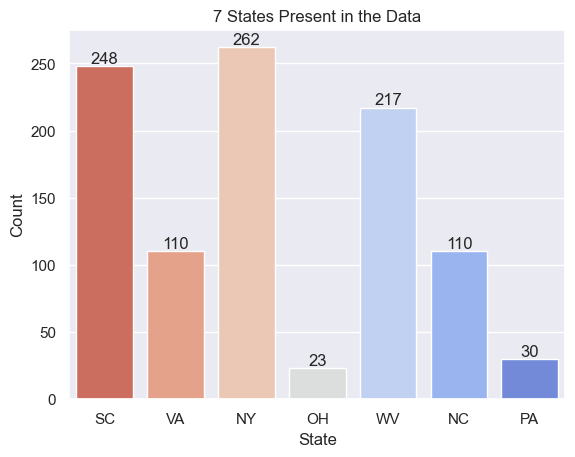

In [73]:
# Counts of Claims for Each State in the Data
ax = sns.countplot(data=df, x="incident_state", palette="coolwarm_r")
for bar in ax.containers:
    ax.bar_label(bar)
ax.set_xlabel("State")
ax.set_ylabel("Count")
ax.set_title("7 States Present in the Data");

In [74]:
# I also think that it will be important to add a column indicating the ligation status, none of these claims were litigated
df["litigated"] = False

In [75]:
# Features that I think are relevant
features = ['age', 'policy_state', "insured_sex", 'incident_date', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 
            'witnesses', 'police_report_available', 'auto_make', 'auto_model', 'auto_year', 'litigated']

In [76]:
# Inspection
df[features].head()

,age,policy_state,insured_sex,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year,litigated
0,48,OH,MALE,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,1,YES,1,2,YES,Saab,92x,2004,False
1,42,IN,MALE,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,1,?,0,0,?,Mercedes,E400,2007,False
2,29,OH,FEMALE,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,3,NO,2,3,NO,Dodge,RAM,2007,False
3,41,IL,FEMALE,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,1,?,1,2,NO,Chevrolet,Tahoe,2014,False
4,44,IL,MALE,2015-02-17,Vehicle Theft,?,Minor Damage,Unknown,NY,1,NO,0,1,NO,Accura,RSX,2009,False


<hr style="border:2px solid blue">

### EDA - removing all cases of fraud from the data

In [77]:
# Restricting the scope of our data to legitimate claims, no fraud
df = df.drop(columns="_c39")
df = df.query("fraud_reported == 'N'")

In [78]:
# Summary of Numeric Features
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,753.000000,753.000000,753.000000,753.000000,753.00000,7.530000e+02,753.000000,753.000000,753.000000,753,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,202.600266,38.884462,550571.297477,1130.810093,1258.43000,1.023904e+06,500419.537849,25432.005312,-26554.581673,2015-01-30 20:02:52.111553792,11.626826,1.808765,0.976096,1.455511,50288.605578,7179.229748,7018.884462,36090.491368,2005.075697
min,0.000000,20.000000,100804.000000,500.000000,433.33000,-1.000000e+06,430104.000000,0.000000,-111100.000000,2015-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.000000,32.000000,342830.000000,500.000000,1097.64000,0.000000e+00,446606.000000,0.000000,-51400.000000,2015-01-16 00:00:00,6.000000,1.000000,0.000000,0.000000,34650.000000,3480.000000,3720.000000,25200.000000,2000.000000
50%,200.000000,38.000000,543610.000000,1000.000000,1253.12000,0.000000e+00,465674.000000,0.000000,-20400.000000,2015-01-31 00:00:00,12.000000,1.000000,1.000000,1.000000,56520.000000,6620.000000,6560.000000,41220.000000,2005.000000
75%,276.000000,44.000000,771509.000000,2000.000000,1422.56000,0.000000e+00,603195.000000,51400.000000,0.000000,2015-02-16 00:00:00,17.000000,3.000000,2.000000,2.000000,69480.000000,11120.000000,10600.000000,49980.000000,2010.000000
max,479.000000,64.000000,998865.000000,2000.000000,2047.59000,1.000000e+07,620962.000000,100500.000000,0.000000,2015-03-01 00:00:00,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000
std,113.574565,8.973139,257323.903505,606.771634,241.24721,2.225209e+06,72123.981953,27918.464555,28280.492080,NaN,6.976417,1.008252,0.816689,1.124415,27575.191379,4961.204029,4828.915463,19698.046058,6.001184


### Correlations

Sub-components of the total claim show a strong correlation and are collinear. The next strongest components are the number of cars per incident and the hour of the day, indicating that later crashes incur more damage, but that relationship may not be predictive. 

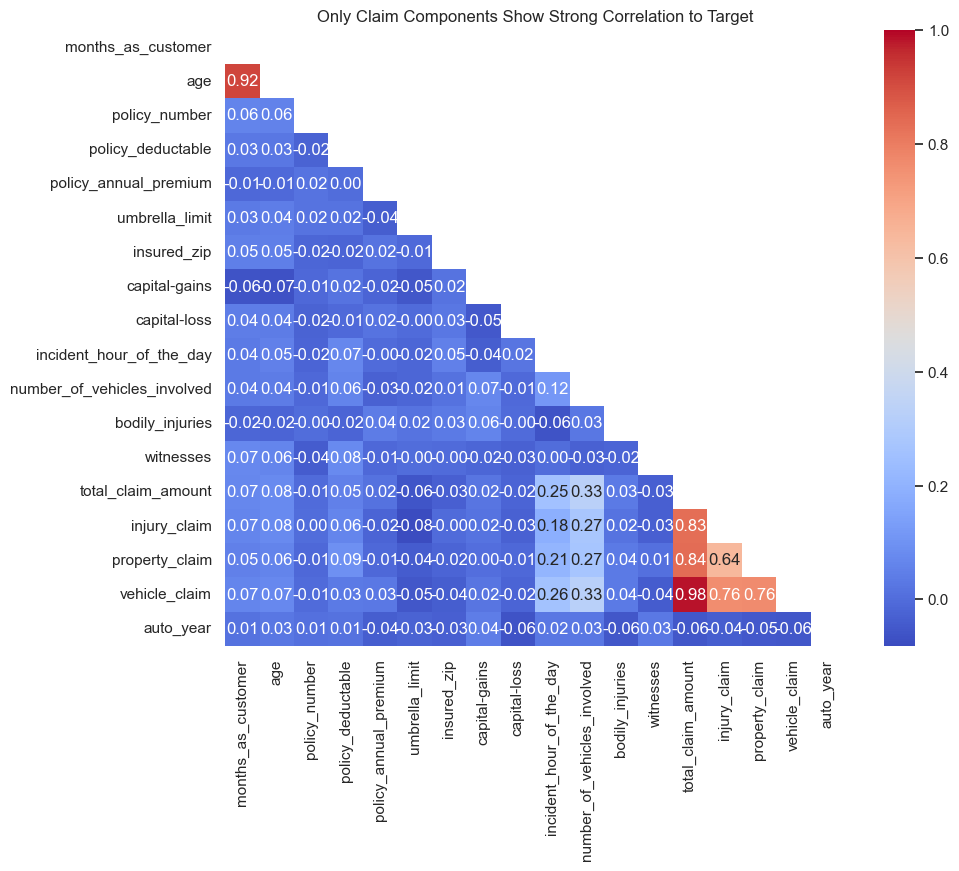

In [79]:
# Heatmap of all of the numeric features, the only strong correlations to total claim are its components
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(df.select_dtypes(include=np.number).corr(), dtype=bool))
sns.heatmap(data=df.select_dtypes(include=np.number).corr(), annot=True, mask=mask, vmin=df.select_dtypes(include=np.number)\
            .corr().min().min(), vmax=df.select_dtypes(include=np.number).corr().max().max(), cmap="coolwarm", ax=ax, cbar=True, fmt=".2f")
ax.set_title("Only Claim Components Show Strong Correlation to Target");

In [80]:
df[features].head()

,age,policy_state,insured_sex,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year,litigated
2,29,OH,FEMALE,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,3,NO,2,3,NO,Dodge,RAM,2007,False
4,44,IL,MALE,2015-02-17,Vehicle Theft,?,Minor Damage,Unknown,NY,1,NO,0,1,NO,Accura,RSX,2009,False
6,34,IN,MALE,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,3,?,0,0,?,Nissan,Pathfinder,2012,False
7,37,IL,MALE,2015-02-27,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,3,?,2,2,YES,Audi,A5,2015,False
8,33,IL,FEMALE,2015-01-30,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,1,NO,1,1,YES,Toyota,Camry,2012,False


<hr style="border: 2px solid blue">

### Insured Sex: These distributions look to be very similiar

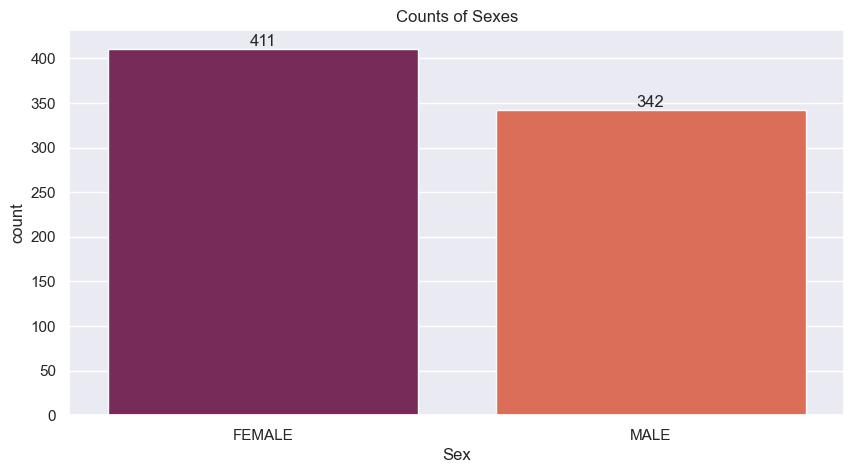

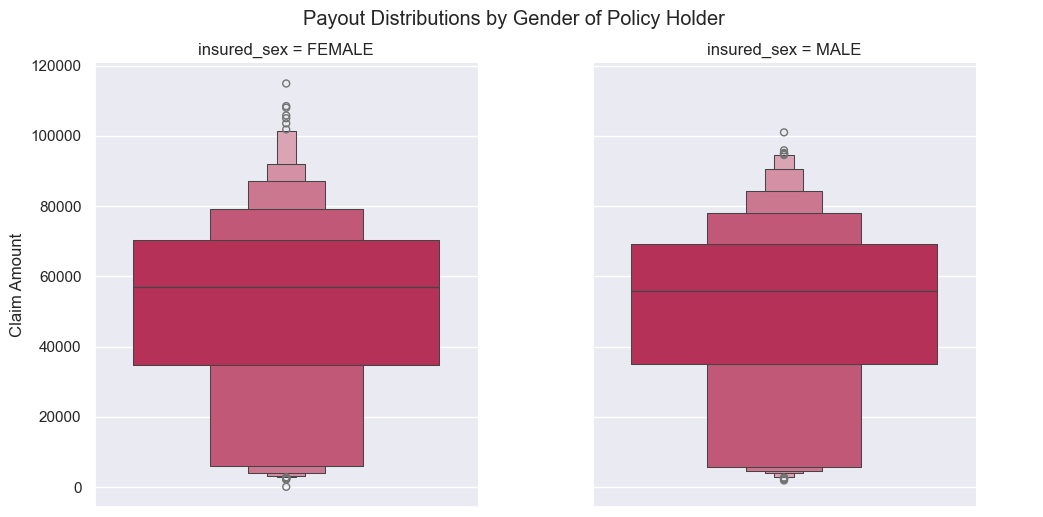

In [81]:
# Categorical Plot of Total Claim Amounts based on the accident type
sns.set()
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x = "insured_sex", palette = "rocket")

ax.set_title("Counts of Sexes")
ax.set_xlabel("Sex")
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()
print()

# Categorical Plot of Total Claim Amounts based on the accident type
g = sns.catplot(kind="boxen", y="total_claim_amount",  col="insured_sex", col_wrap=2, data=df, sharey=True, palette="rocket")
g.fig.subplots_adjust(wspace=0.3) 
g.set(ylabel="Claim Amount", xlabel="")
g.figure.suptitle("Payout Distributions by Gender of Policy Holder", y=1.03);

<hr style="border: 2px solid blue">

### Types of Incidents
There are many more collision claims than parked car or theft claims. Unsurprisingly, the collision cases are much larger than the other types of incidents. `Somewhat surprising is that the claim ranges for single vs multi-vehicle claims are nearly equivalent. `

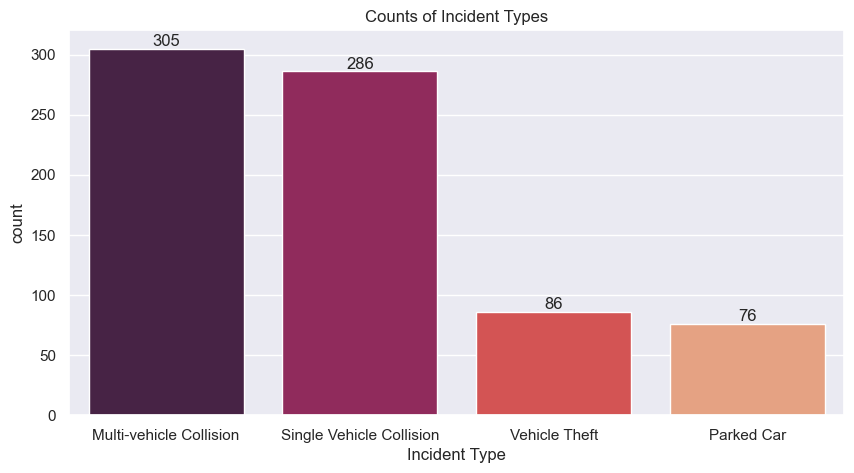

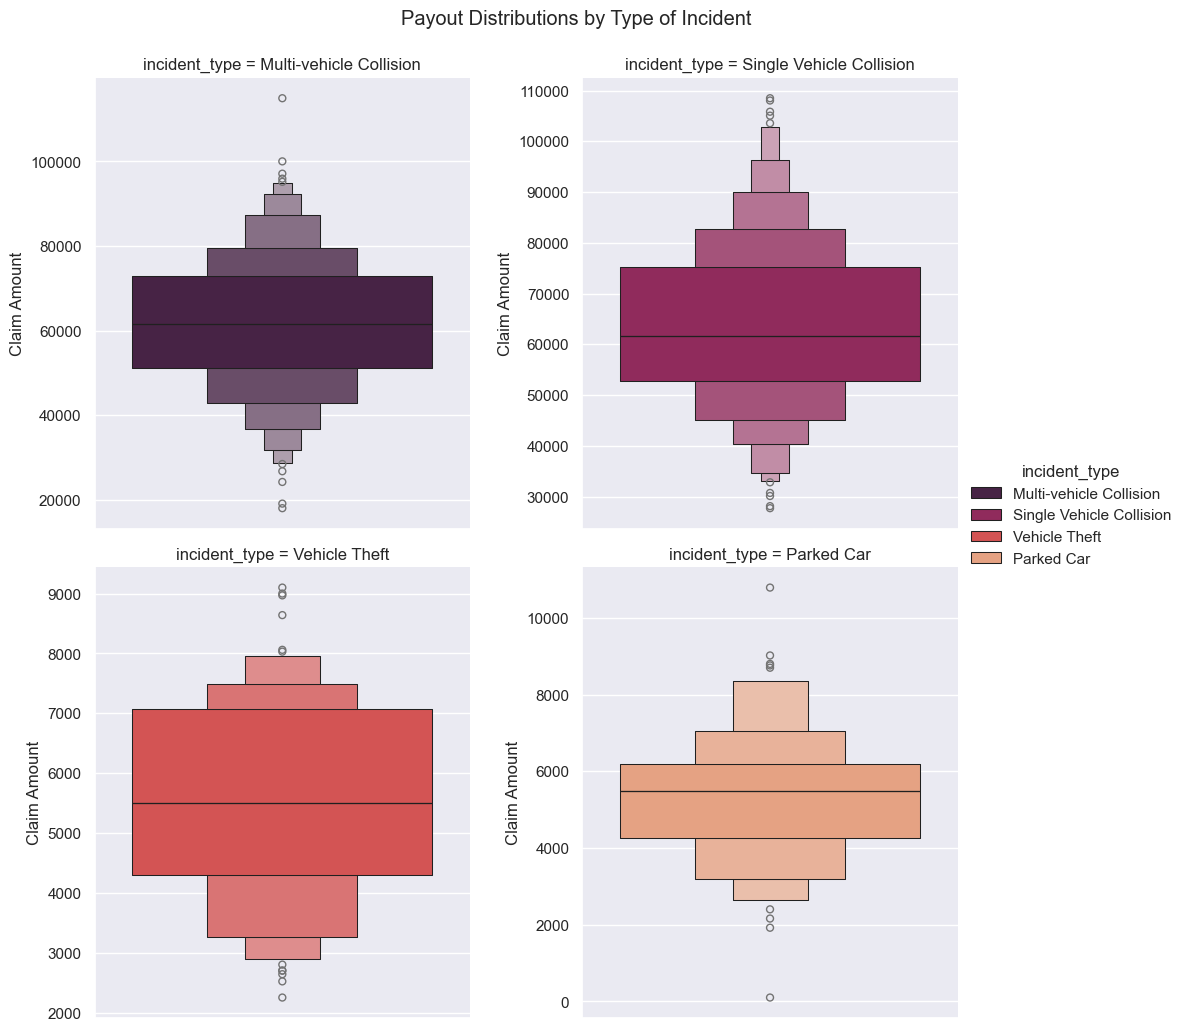

In [82]:
# Categorical Plot of Total Claim Amounts based on the accident type
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x = "incident_type", palette = "rocket", \
                   order=["Multi-vehicle Collision", "Single Vehicle Collision", "Vehicle Theft", "Parked Car"])
ax.set_title("Counts of Incident Types")
ax.set_xlabel("Incident Type")
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()
print()

# Categorical Plot of Total Claim Amounts based on the accident type
g = sns.catplot(kind="boxen", y="total_claim_amount",  col="incident_type", col_wrap=2, data=df, sharey=False, \
                col_order=["Multi-vehicle Collision", "Single Vehicle Collision", "Vehicle Theft", "Parked Car"], \
                hue="incident_type", hue_order=["Multi-vehicle Collision", "Single Vehicle Collision", "Vehicle Theft", "Parked Car"],
                palette="rocket")
g.fig.subplots_adjust(wspace=0.3) 
g.set(ylabel="Claim Amount", xlabel="")
g.figure.suptitle("Payout Distributions by Type of Incident", y=1.03);

<hr style="border: 2px solid blue">

### Incident Severity

Incidents with minor damage had a much larger inner-quartile range. Nonetheless, median claim amounts are surprisingly similar for each of the top three categories excluding "Trivial".

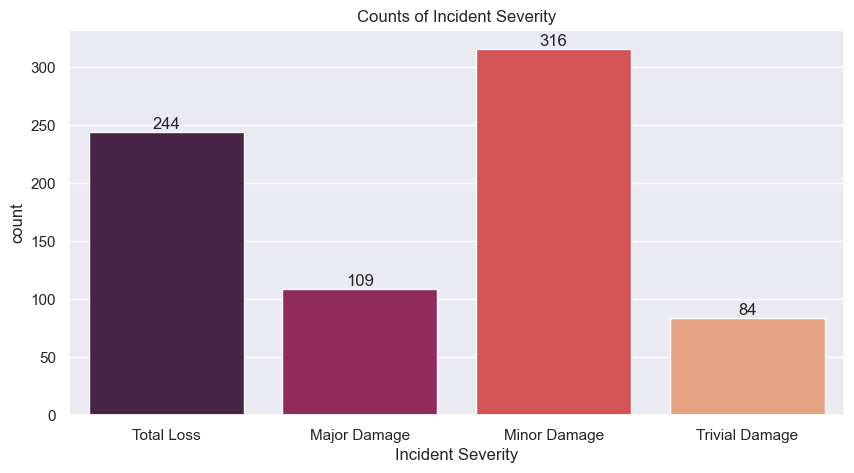

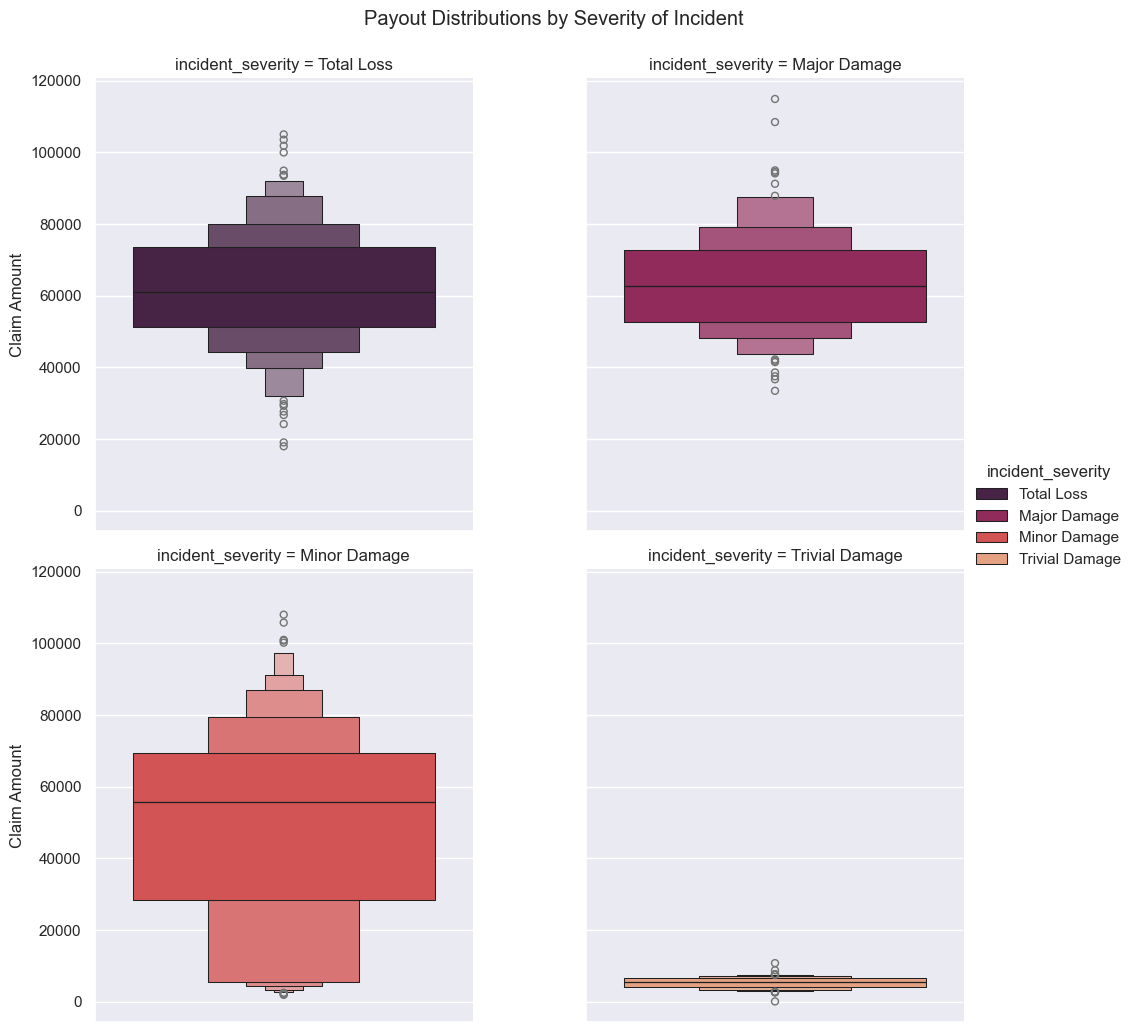

In [83]:
# Categorical Plot of Total Claim Amounts based on the accident type
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x = "incident_severity", palette = "rocket", \
                   order=["Total Loss", "Major Damage", "Minor Damage", "Trivial Damage"])
ax.set_title("Counts of Incident Severity")
ax.set_xlabel("Incident Severity")
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()
print()

# Categorical Plot of Total Claim Amounts based on the accident type
g = sns.catplot(kind="boxen", y="total_claim_amount",  col="incident_severity", col_wrap=2, data=df, sharey=True, \
                col_order=["Total Loss", "Major Damage", "Minor Damage", "Trivial Damage"], \
                hue="incident_severity", hue_order=["Total Loss", "Major Damage", "Minor Damage", "Trivial Damage"],
                palette="rocket")
g.fig.subplots_adjust(wspace=0.3) 
g.set(ylabel="Claim Amount", xlabel="")
g.figure.suptitle("Payout Distributions by Severity of Incident", y=1.03);

<hr style="border: 2px solid blue">

### Collision Type: With the exception of '?', all distributions look similar.

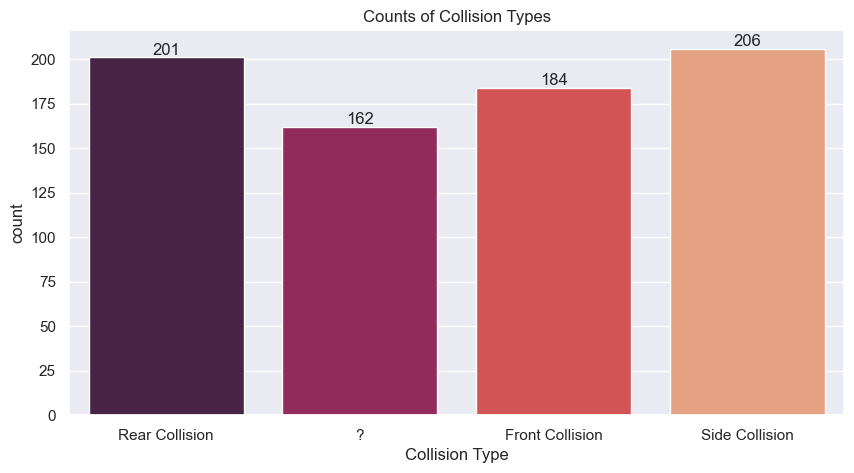

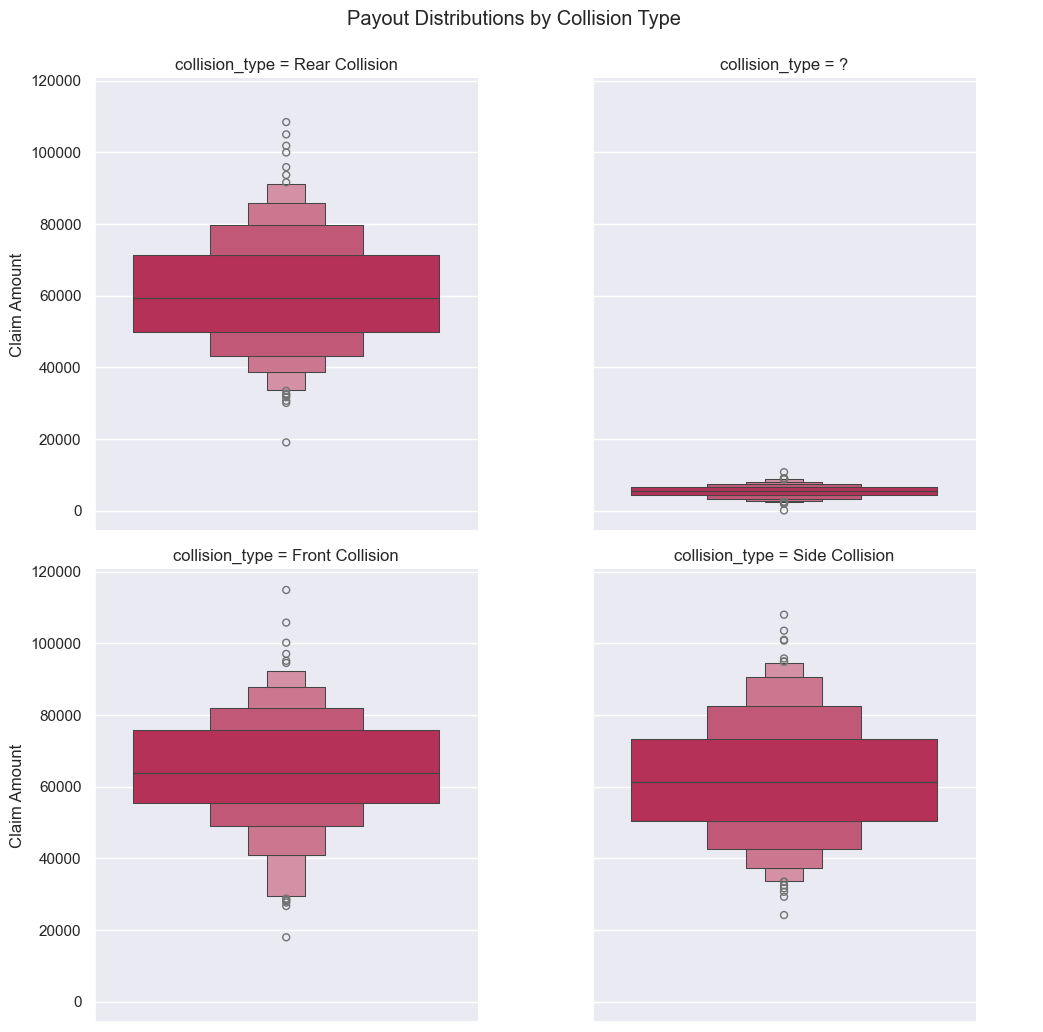

In [84]:
# Categorical Plot of Total Claim Amounts based on the accident type
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x = "collision_type", palette = "rocket")

ax.set_title("Counts of Collision Types")
ax.set_xlabel("Collision Type")
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()
print()

# Categorical Plot of Total Claim Amounts based on the accident type
g = sns.catplot(kind="boxen", y="total_claim_amount",  col="collision_type", col_wrap=2, data=df, sharey=True, palette="rocket")
g.fig.subplots_adjust(wspace=0.3) 
g.set(ylabel="Claim Amount", xlabel="")
g.figure.suptitle("Payout Distributions by Collision Type", y=1.03);

<hr style="border: 2px solid blue">

# Location Data
- policy_state reflects potentially useful information
- insured_zip is basically useless, the zipcodes do not relate to the accident location, and also `are not real zip codes.`
- incident_state seems more useful and generalizable
- incident_city could provide additional granular detail, but may increase feature space too greatly

Even with the imbalanced sizes of samples from each state, the median total claim was shockingly similar. 

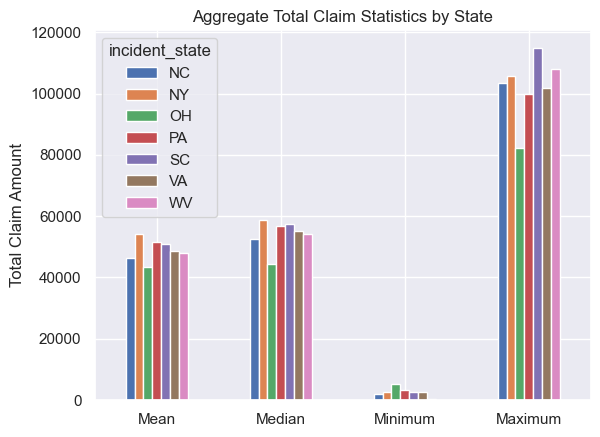

In [85]:
sns.set()
df.groupby("incident_state")["total_claim_amount"].agg(["mean", "median", "min", "max"])\
.T.plot(kind="bar", title="Aggregate Total Claim Statistics by State")
plt.ylabel("Total Claim Amount")
plt.xticks(ticks=range(4), labels=["Mean", "Median", "Minimum", "Maximum"], rotation=0);

In [86]:
# The insured zip refers to the policy state but does not correspond to actual valid zip codes, nor the accident location
df[["policy_state", "insured_zip", "incident_state", "incident_city"]].head()

,policy_state,insured_zip,incident_state,incident_city
2,OH,430632,NY,Columbus
4,IL,610706,NY,Arlington
6,IN,441716,NY,Springfield
7,IL,603195,VA,Columbus
8,IL,601734,WV,Arlington


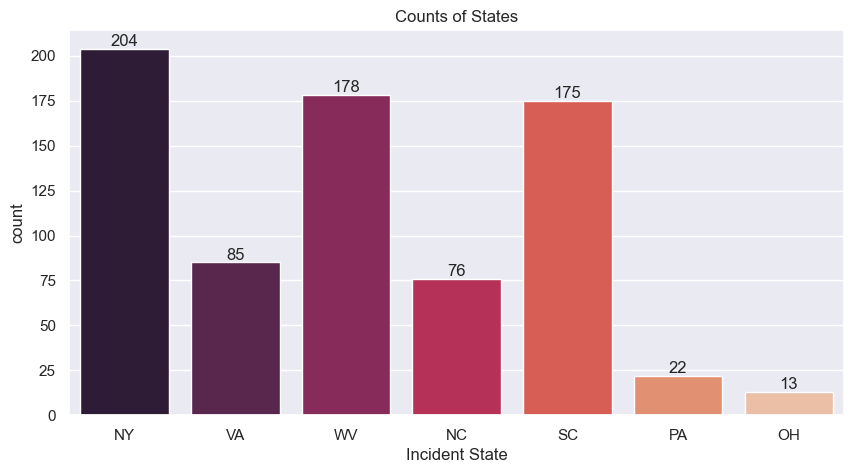

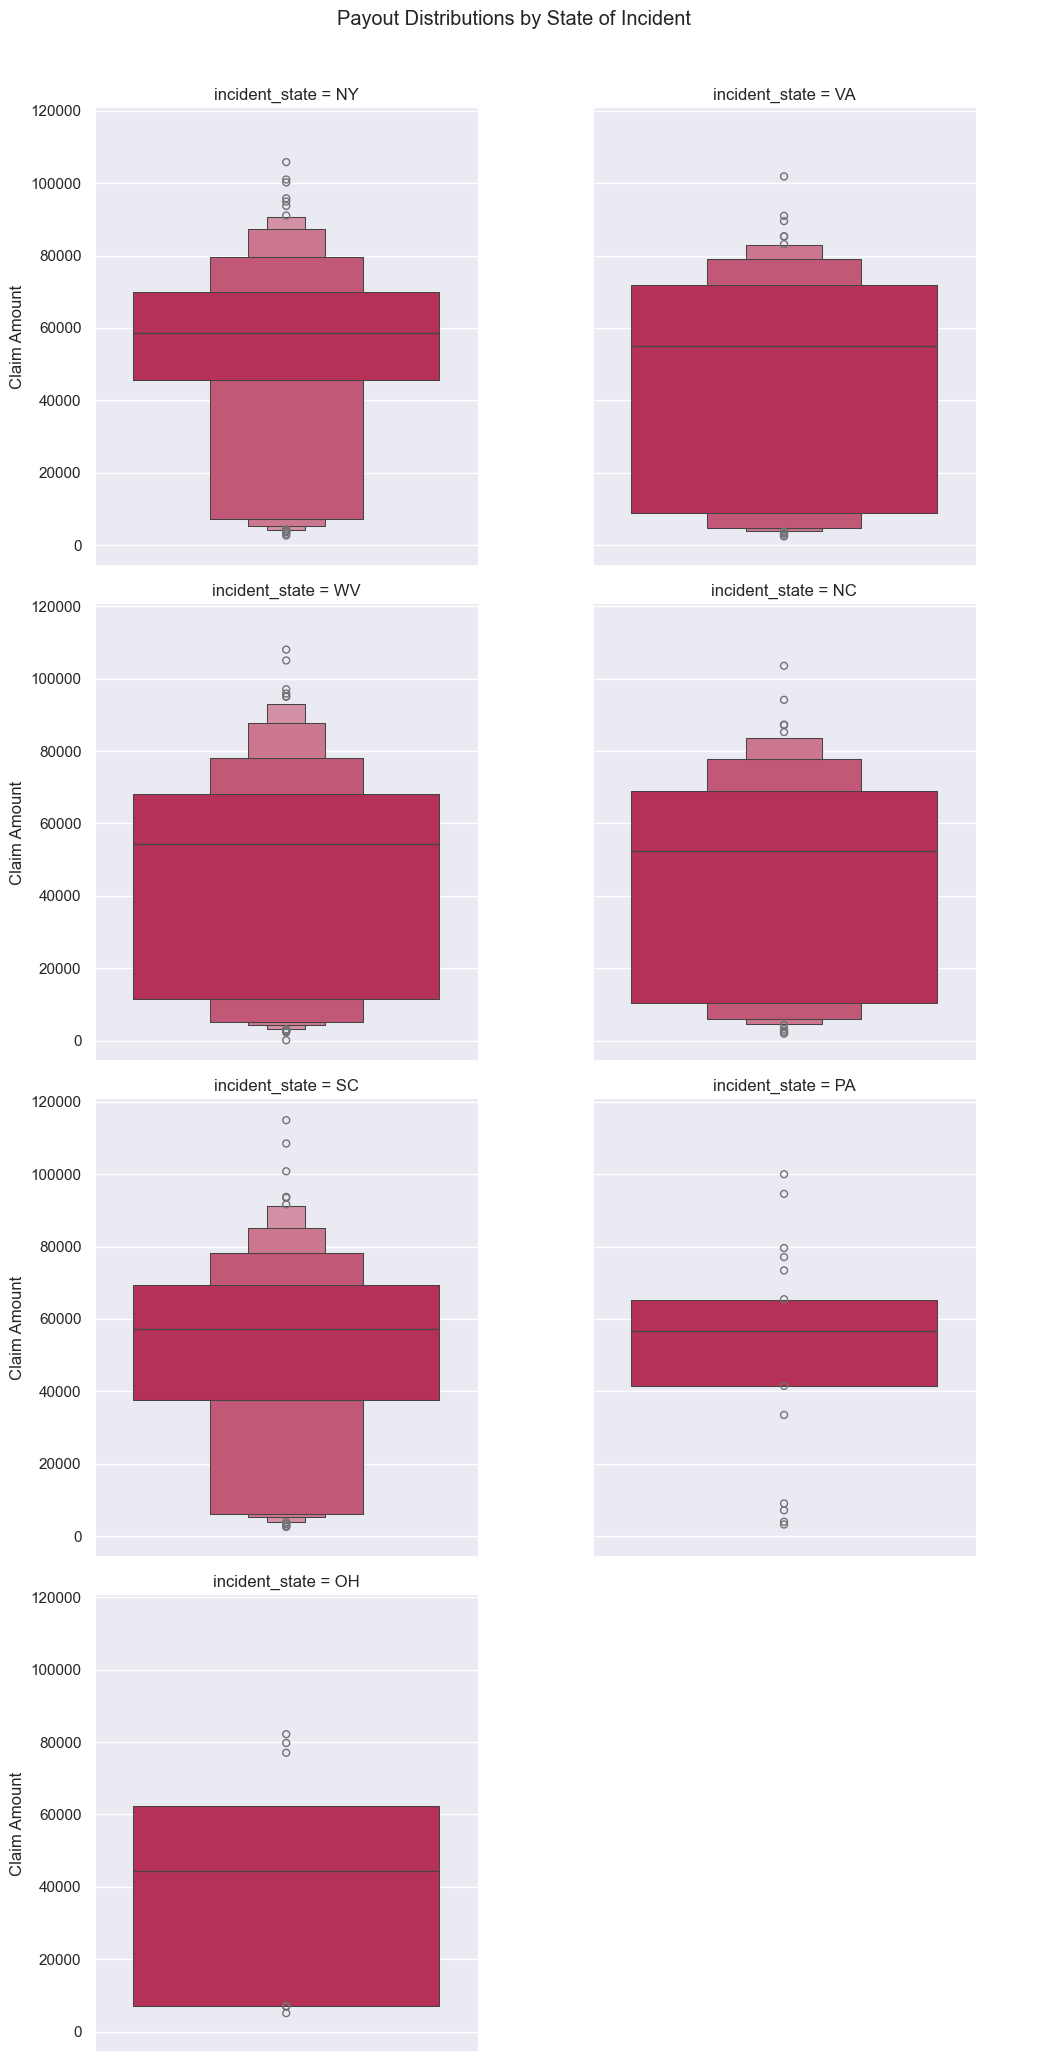

In [87]:
# Categorical Plot of Total Claim Amounts based on the accident type
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x = "incident_state", palette = "rocket")

ax.set_title("Counts of States")
ax.set_xlabel("Incident State")
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()
print()

# Categorical Plot of Total Claim Amounts based on the accident type
g = sns.catplot(kind="boxen", y="total_claim_amount",  col="incident_state", col_wrap=2, data=df, sharey=True, palette="rocket")
g.fig.subplots_adjust(wspace=0.3) 
g.set(ylabel="Claim Amount", xlabel="")
g.figure.suptitle("Payout Distributions by State of Incident", y=1.03);

<hr style="border: 2px solid blue">

# Time of Day Data
The heatmap indicates that later times correlate with larger claim amounts. The median values seem to be fairly static during normal hours and subdued during sleep hours. Given the small size of this dataset, I think it is important not to read to deeply into the frequency and time of outlier data points. 

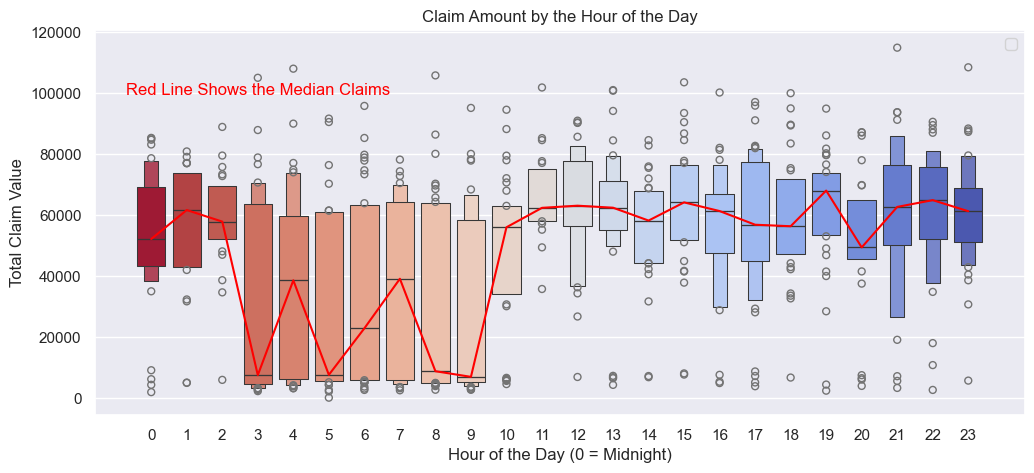

In [88]:
# Boxen plots of incidents at various hours of the day
sns.set()
fig, ax = plt.subplots(figsize=(12,5))
sns.boxenplot(data=df, x="incident_hour_of_the_day", y="total_claim_amount", hue="incident_hour_of_the_day", palette="coolwarm_r", ax=ax)
ax.set_title("Claim Amount by the Hour of the Day")
plt.legend("")
plt.xlabel("Hour of the Day (0 = Midnight)")
plt.ylabel("Total Claim Value")
plt.plot(df.groupby("incident_hour_of_the_day")["total_claim_amount"].median(), color="red", label="Medians")
plt.annotate(text="Red Line Shows the Median Claims", xy=(0, 1e5), xytext=(3, 99_500), ha="center", color="red");

<hr style="border: 2px solid blue">

### Number of Vehicles

Distributions for claims with multiple cars seem far closer to "normal" than single car incidents. There are far more claims with 1 and 3 cars involved respectively. `The 1-car claims seem to be bi-modal,` possibly indicating that there are many minor claims that get filed in addition to conventional car accidents. The 2 and 4 car claims seem normally distributed, but there counts are so small as to be very difficult to tell. 

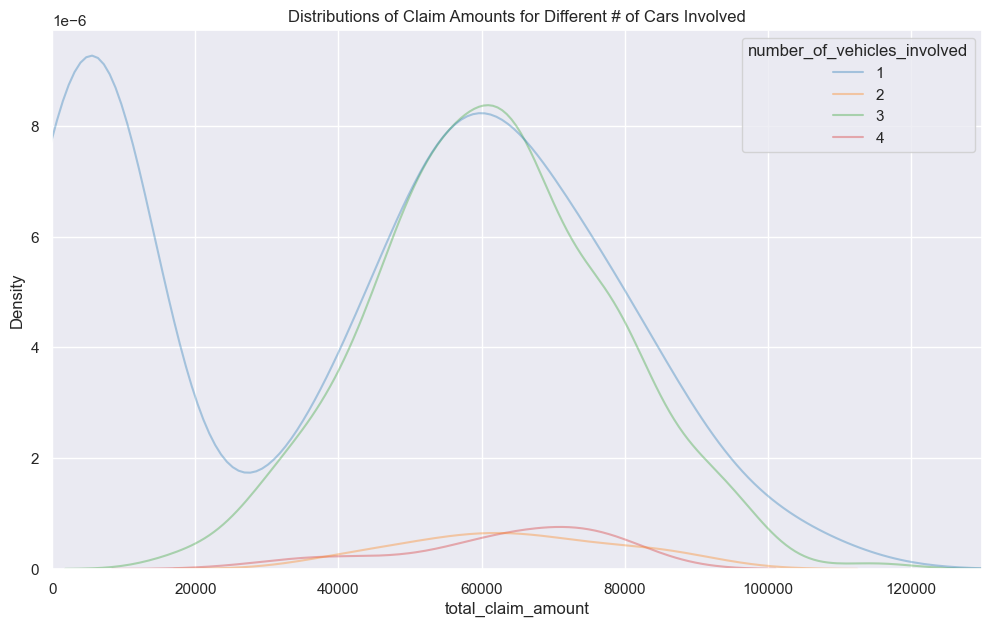

In [89]:
fig, ax = plt.subplots(figsize=(12,7))
sns.kdeplot(data=df, x="total_claim_amount", hue="number_of_vehicles_involved", alpha=.35, palette="tab10")
plt.xlim(0, 130_000)
plt.title("Distributions of Claim Amounts for Different # of Cars Involved");

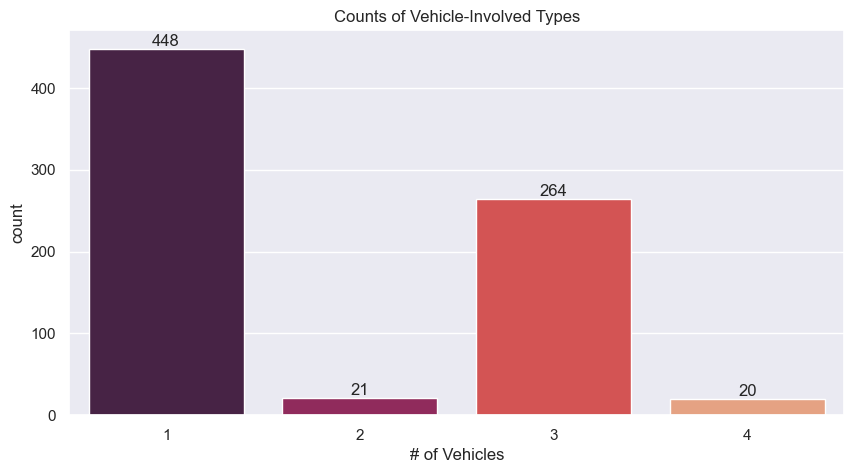

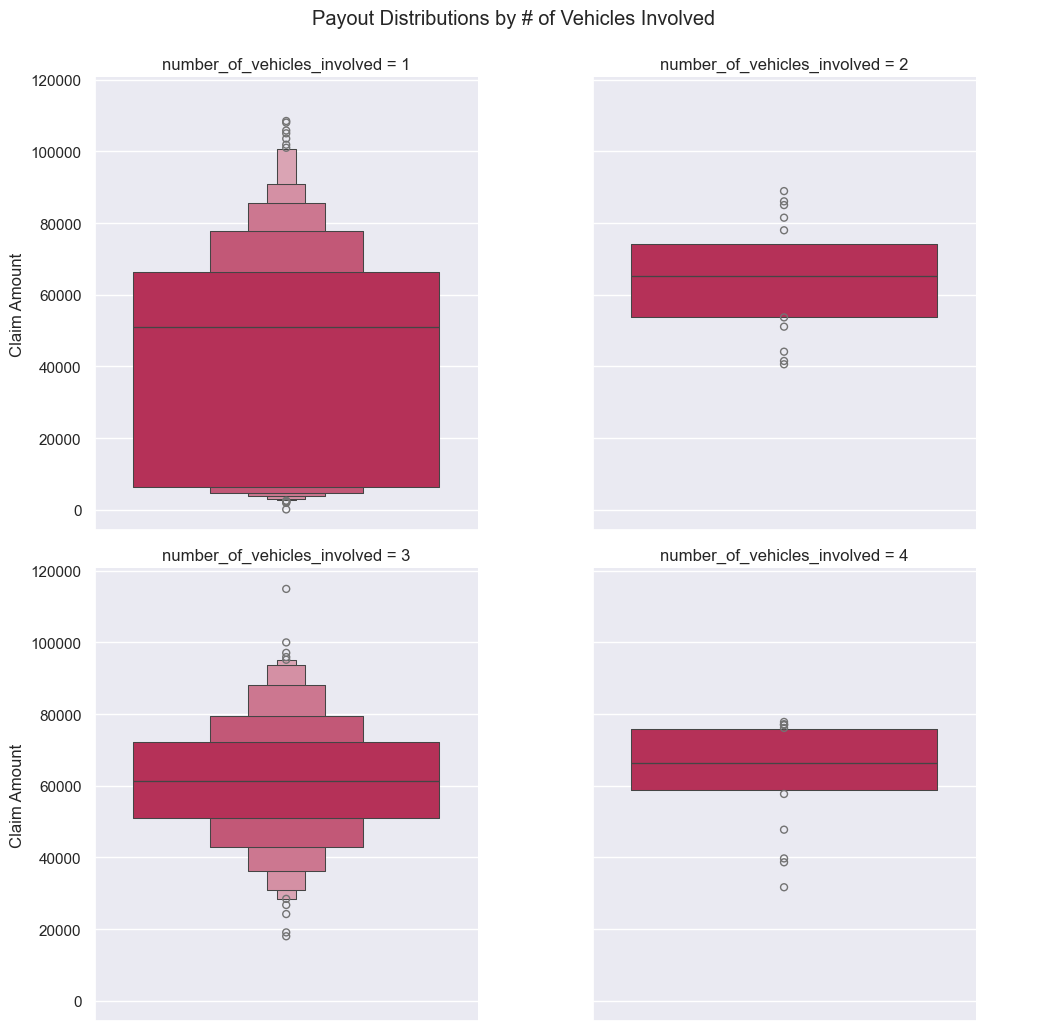

In [90]:
# Categorical Plot of Total Claim Amounts based on the accident type
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x = "number_of_vehicles_involved", palette = "rocket")

ax.set_title("Counts of Vehicle-Involved Types")
ax.set_xlabel("# of Vehicles")
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()
print()

# Categorical Plot of Total Claim Amounts based on the accident type
g = sns.catplot(kind="boxen", y="total_claim_amount",  col="number_of_vehicles_involved", col_wrap=2, data=df, sharey=True, palette="rocket")
g.fig.subplots_adjust(wspace=0.3) 
g.set(ylabel="Claim Amount", xlabel="")
g.figure.suptitle("Payout Distributions by # of Vehicles Involved", y=1.03);

<hr style="border: 2px solid blue">

### Bodily Injuries: These distributions are very similar and counterintuitive to a certain extent. More bodily injuries do not equate to larger claims.

In [91]:
df.groupby("bodily_injuries")["total_claim_amount"].agg(["min", "median", "mean", "max"]).T

bodily_injuries,0,1,2
min,2640.000000,100.000000,2640.000000
median,56700.000000,54000.000000,57935.000000
mean,50381.346154,47743.466135,52828.760331
max,105820.000000,114920.000000,108480.000000


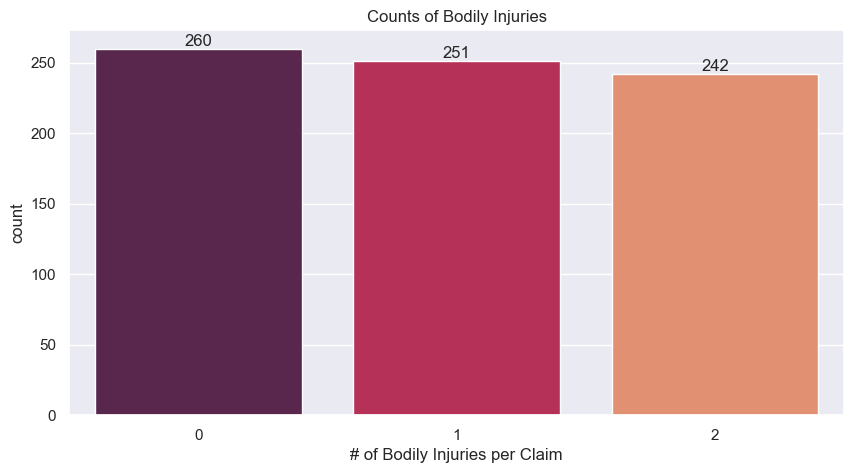

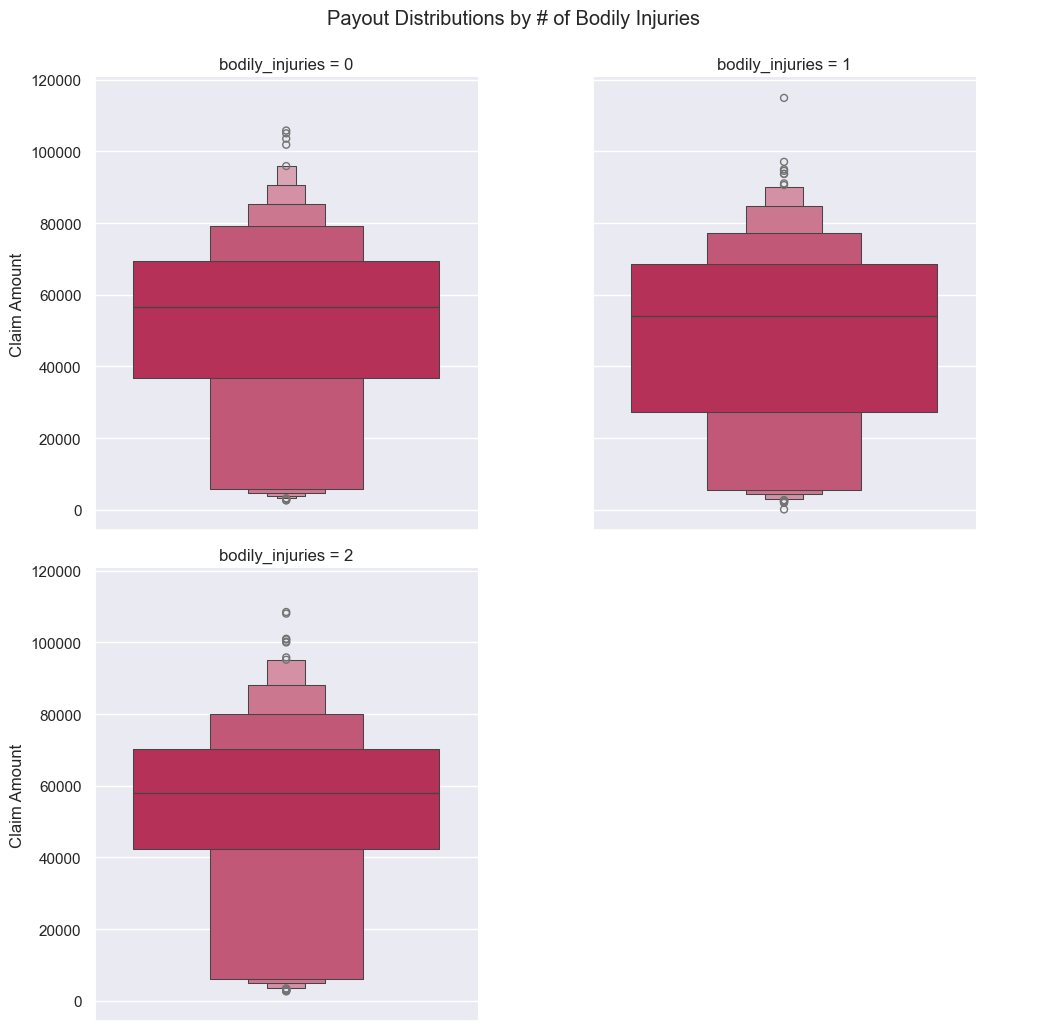

In [92]:
# Categorical Plot of Total Claim Amounts based on the accident type
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x = "bodily_injuries", palette = "rocket")

ax.set_title("Counts of Bodily Injuries")
ax.set_xlabel("# of Bodily Injuries per Claim")
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()
print()

# Categorical Plot of Total Claim Amounts based on the accident type
g = sns.catplot(kind="boxen", y="total_claim_amount",  col="bodily_injuries", col_wrap=2, data=df, sharey=True, palette="rocket")
g.fig.subplots_adjust(wspace=0.3) 
g.set(ylabel="Claim Amount", xlabel="")
g.figure.suptitle("Payout Distributions by # of Bodily Injuries", y=1.03);

<hr style="border: 2px solid blue">

### Police Report Available: In this case, we do see that having a police report seems to increase the value of a claim.

In [93]:
df.groupby("police_report_available")["total_claim_amount"].agg(["min", "median", "mean", "max"]).T

police_report_available,?,NO,YES
min,100.000000,2250.000000,1920.00000
median,58050.000000,55500.000000,57110.00000
mean,52171.141732,46738.015564,52083.38843
max,108480.000000,105040.000000,114920.00000


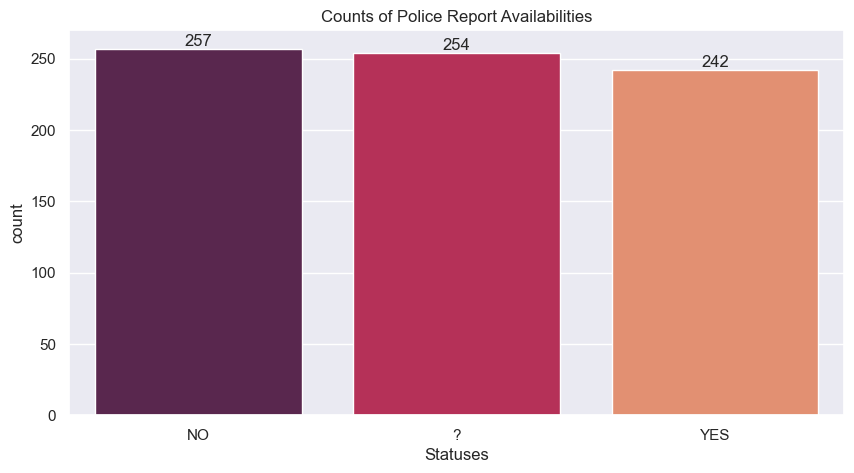

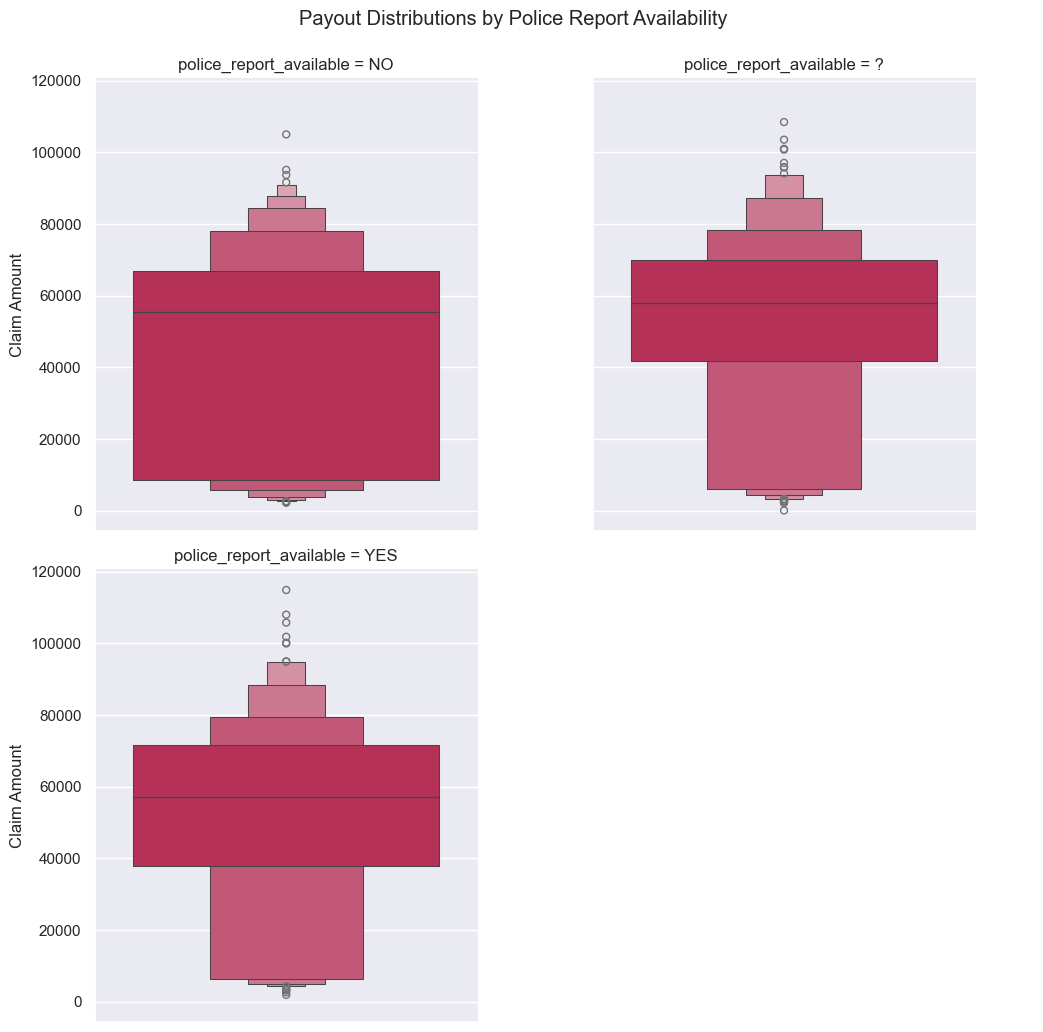

In [94]:
# Categorical Plot of Total Claim Amounts based on the accident type
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x = "police_report_available", palette = "rocket")

ax.set_title("Counts of Police Report Availabilities")
ax.set_xlabel("Statuses")
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()
print()

# Categorical Plot of Total Claim Amounts based on the accident type
g = sns.catplot(kind="boxen", y="total_claim_amount",  col="police_report_available", col_wrap=2, data=df, sharey=True, palette="rocket")
g.fig.subplots_adjust(wspace=0.3) 
g.set(ylabel="Claim Amount", xlabel="")
g.figure.suptitle("Payout Distributions by Police Report Availability", y=1.03);

In [95]:
# Create a csv with the features I think are most useful
df[features].to_csv("clean_and_filtered_data.csv")

<hr style="border: 4px solid black">

### Notes from previous meeting:

US vs Canada Data

Data must be from the US to avoid differences in cost and laws

Start with standard medical bills besides workers compensation, 
- medical codes
- procedures
- Where is this Data?
- How can we gain an understanding of the costs/codes/and source of data
- GitHub and Kaggle Data Sets
- Official US Websites 

### We will have to figure these things out ourselves!
##### Google Searches

- Look at research papers in the domain
- Consider all personal injuries NOT JUST CAR ACCIDENTS
- Data Scarcity is a concern

### Majority of the work is going to be wrangling data
- What do we want to extract from the data that we find, use domain research papers for guidance

- Vivek says simplify the problem where we have a US dataset, which are the types of injury with the maximum claims